<a href="https://colab.research.google.com/github/anandaru/NIT/blob/main/HistogramAndTransformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Import necessary libraries
import cv2
from google.colab.patches import cv2_imshow

# Define the path to the image
image_path = '/content/drive/MyDrive/FELV-cat.jpg'

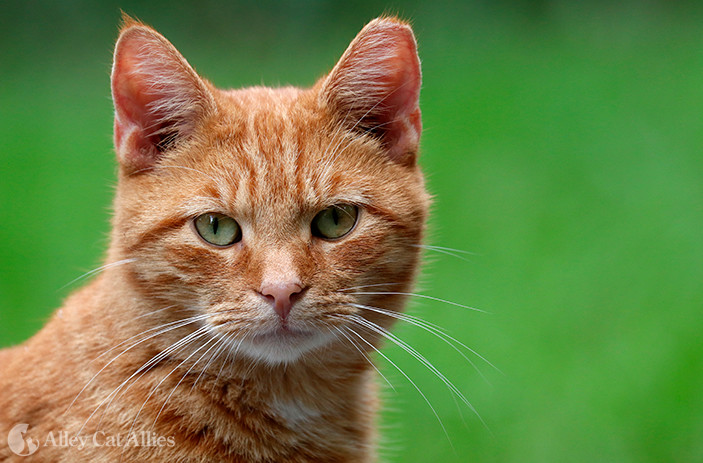

In [4]:

# Read the image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
cv2_imshow(image)

In [5]:
# Get the dimensions of the image
height, width, channels = image.shape

# Print the size of the image
print("Image width:", width)
print("Image height:", height)
print("Number of channels:", channels)

Image width: 703
Image height: 463
Number of channels: 3


# Convert to Grayscale

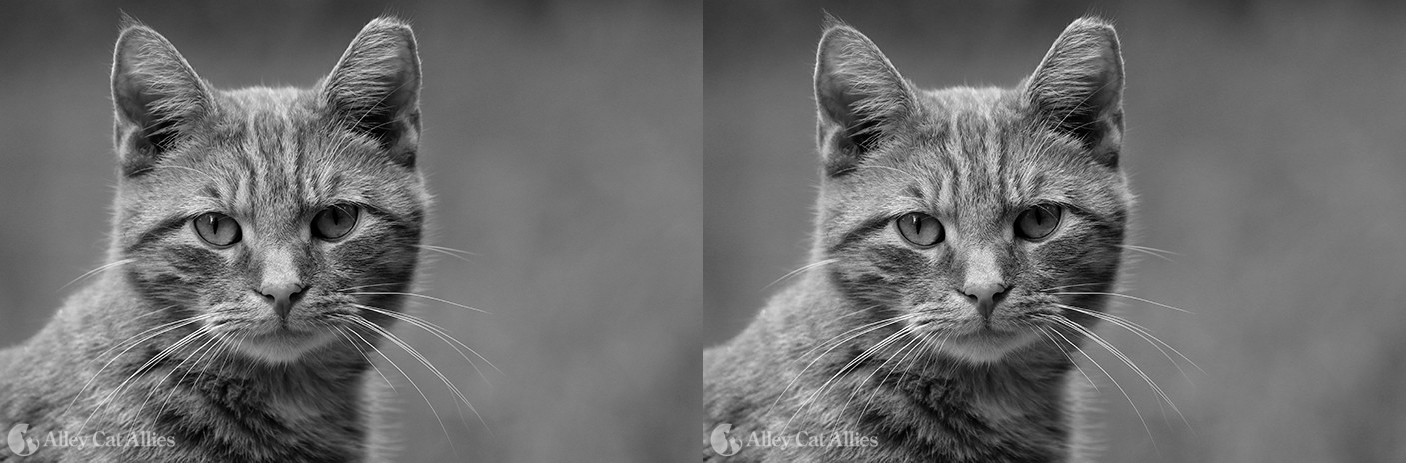

In [6]:
import numpy as np
# Convert to grayscale manually (weighted sum of R, G, B channels)
gray_image_manual1 = np.dot(image[:, :, :], [0.3, 0.6, 0.1]).astype(np.uint8)
gray_image_manual2 = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
image_stacked1= np.hstack((gray_image_manual1,gray_image_manual2))
cv2_imshow(image_stacked1)

# Calculate histogram of image

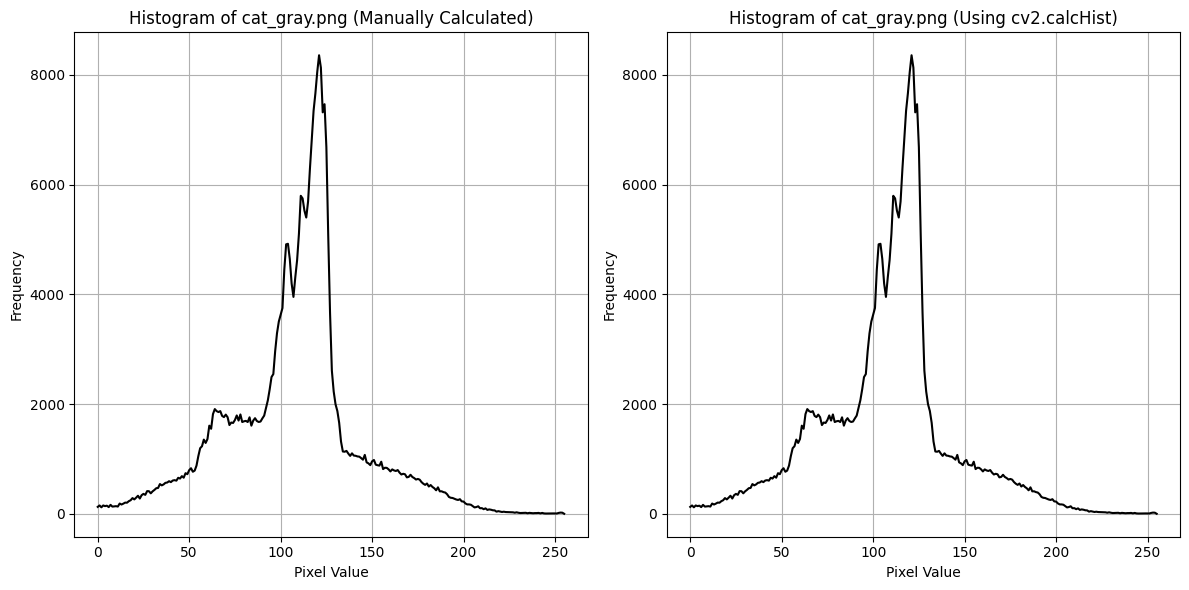

In [7]:
import matplotlib.pyplot as plt

# Initialize histogram bins
hist_bins_manual = np.zeros(256)

# Calculate histogram manually
for i in range(gray_image_manual1.shape[0]):
    for j in range(gray_image_manual1.shape[1]):
        pixel_value = gray_image_manual1[i, j]
        hist_bins_manual[pixel_value] += 1

# Calculate histogram using inbuilt function
hist_bins_inbuilt = cv2.calcHist([gray_image_manual1], [0], None, [256], [0,256])

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_bins_manual, color='black')
plt.title('Histogram of cat_gray.png (Manually Calculated)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hist_bins_inbuilt, color='black')
plt.title('Histogram of cat_gray.png (Using cv2.calcHist)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


In [8]:
from collections import Counter

# Extract intensity levels from the image
c = [1,1,2,2,2,2,3,3,3,4,5,5,6,6,6,6,7,8]

# Count the occurrences of each intensity level
counts = Counter(c)
counts

Counter({1: 2, 2: 4, 3: 3, 4: 1, 5: 2, 6: 4, 7: 1, 8: 1})

# Histogram equalization

Histogram equalization is a technique used in image processing to improve the contrast and enhance the overall appearance of an image. It redistributes the intensity values of the pixels in an image to make better use of the available dynamic range. Here's why a picture may appear clearer after histogram equalization:

**Improved Contrast:** Histogram equalization spreads out the intensity values across the entire dynamic range of the image. This means that areas of the image that were previously too dark or too bright may now have a wider range of intensity values, leading to improved contrast. As a result, details that were previously difficult to distinguish due to poor contrast become more pronounced and easier to see.

**Enhanced Visibility of Features:** Histogram equalization enhances the visibility of features in the image by making subtle differences in intensity more apparent. This can help bring out details that were previously hidden in shadowed or overexposed regions of the image.




Here are the general steps involved in histogram equalization:

**Compute Histogram:** Calculate the histogram of the input grayscale image. The histogram represents the frequency distribution of intensity values in the image.

**Normalize Histogram:** Normalize the histogram by dividing each bin value by the total number of pixels in the image. This step transforms the histogram into a probability distribution function (PDF).

**Compute Cumulative Distribution Function (CDF):** Calculate the cumulative distribution function (CDF) of the normalized histogram. The CDF represents the cumulative sum of probabilities up to each intensity level.

**Histogram Equalization Transformation: **Apply the histogram equalization transformation to each pixel in the image. For each pixel intensity value, map it to a new intensity value using the formula:

**Adjust Pixel Intensities:** Apply the new intensity values obtained from the histogram equalization transformation to the corresponding pixels in the image.

**Output Equalized Image:** The resulting image after histogram equalization will have enhanced contrast, with a more uniform distribution of intensity values across the entire range.

# Compute Histogram:

In [39]:
from collections import Counter
import pandas as pd

# Extract intensity levels from the image
intensity_levels = gray_image_manual1.flatten().tolist()

# Count the occurrences of each intensity level
intensity_counts = Counter(intensity_levels)

# Create a DataFrame with intensity levels and their counts
df = pd.DataFrame(intensity_counts.items(), columns=['Intensity Level', 'Count'])

# Print the DataFrame
df = df.sort_values(by='Intensity Level', ascending=True)
df

Intensity Level  Count
241                0    126
239                1    152
240                2    118
238                3    152
236                4    140
..               ...    ...
250              250      7
248              251      6
252              252     16
245              253     22
247              254     20

[255 rows x 2 columns]

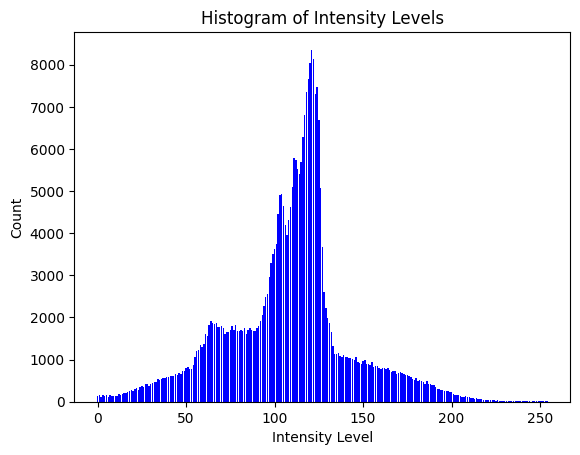

In [40]:
# Plot the histogram
plt.bar(df['Intensity Level'], df['Count'], color='blue')
plt.title('Histogram of Intensity Levels')
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.show()

# Normalize Histogram /Compute Cumulative Distribution Function (CDF)/Adjust Pixel Intensities

In [23]:
L

254

In [41]:
# max range of intensity
L = 256

# Calculate total intensity
total_intensity = sum(df['Count'])

# Calculate intensity probabilities (PDF)
df['PDF'] = df['Count'] / total_intensity

# Calculate cumulative probabilities (CDF)
df['CDF'] = df['PDF'].cumsum()

# Histogram Equalization level
df['HistEqLevel'] = round(df['CDF'] * (L-1)).astype(int)

# Display the table
df

Intensity Level  Count       PDF       CDF  HistEqLevel
241                0    126  0.000387  0.000387            0
239                1    152  0.000467  0.000854            0
240                2    118  0.000363  0.001217            0
238                3    152  0.000467  0.001684            0
236                4    140  0.000430  0.002114            1
..               ...    ...       ...       ...          ...
250              250      7  0.000022  0.999803          255
248              251      6  0.000018  0.999822          255
252              252     16  0.000049  0.999871          255
245              253     22  0.000068  0.999939          255
247              254     20  0.000061  1.000000          255

[255 rows x 5 columns]

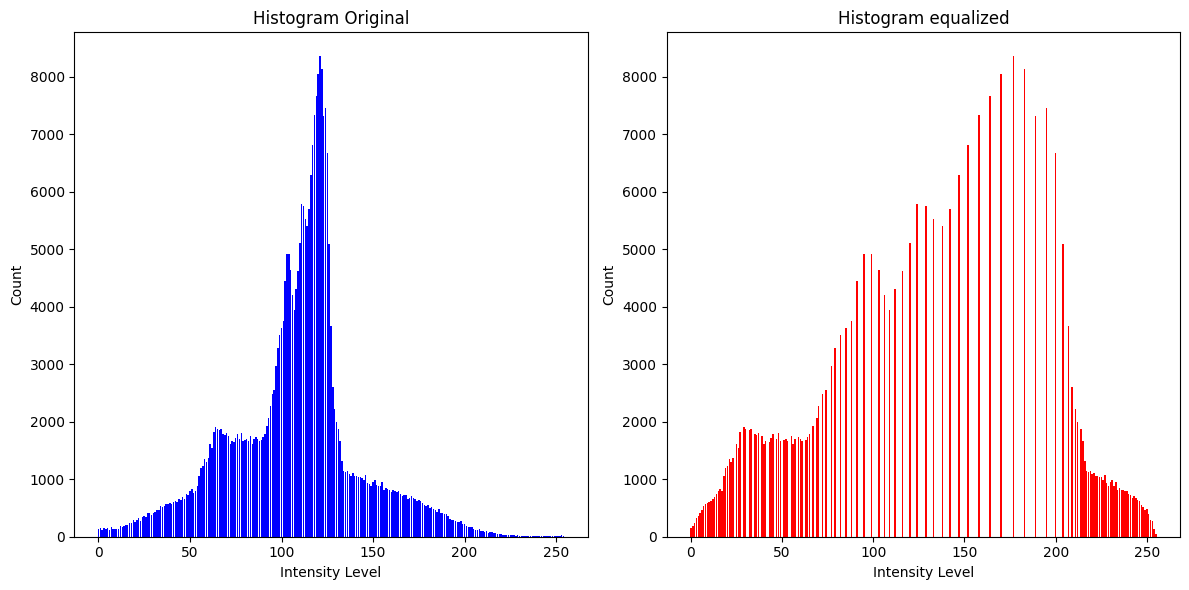

In [42]:
# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(df['Intensity Level'], df['Count'], color='blue')
plt.title('Histogram Original')
plt.xlabel('Intensity Level')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(df['HistEqLevel'], df['Count'], color='red')
plt.title('Histogram equalized')
plt.xlabel('Intensity Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Output Equalized Image - Back projection:

The back projection (or "project") of a histogrammed image is the re-application of the modified histogram to the original image, functioning as a look-up table for pixel brightness values.

In [43]:
# Create a dictionary to map values from Intensity Level to HistEqLevel
mapping = {key: value for key, value in zip(df['Intensity Level'], df['HistEqLevel'] )}
print(mapping)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 3, 21: 3, 22: 3, 23: 4, 24: 4, 25: 4, 26: 4, 27: 5, 28: 5, 29: 5, 30: 6, 31: 6, 32: 6, 33: 7, 34: 7, 35: 8, 36: 8, 37: 8, 38: 9, 39: 9, 40: 10, 41: 10, 42: 11, 43: 11, 44: 12, 45: 12, 46: 13, 47: 13, 48: 14, 49: 14, 50: 15, 51: 16, 52: 16, 53: 17, 54: 18, 55: 18, 56: 19, 57: 20, 58: 21, 59: 22, 60: 23, 61: 25, 62: 26, 63: 27, 64: 29, 65: 30, 66: 32, 67: 33, 68: 35, 69: 36, 70: 37, 71: 39, 72: 40, 73: 41, 74: 43, 75: 44, 76: 45, 77: 47, 78: 48, 79: 49, 80: 51, 81: 52, 82: 53, 83: 55, 84: 56, 85: 57, 86: 59, 87: 60, 88: 61, 89: 63, 90: 64, 91: 65, 92: 67, 93: 69, 94: 70, 95: 72, 96: 74, 97: 77, 98: 79, 99: 82, 100: 85, 101: 88, 102: 91, 103: 95, 104: 99, 105: 103, 106: 106, 107: 109, 108: 112, 109: 116, 110: 120, 111: 124, 112: 129, 113: 133, 114: 138, 115: 142, 116: 147, 117: 152, 118: 158, 119: 164, 120: 170, 121: 177, 122: 183, 123: 189, 124: 195, 125:

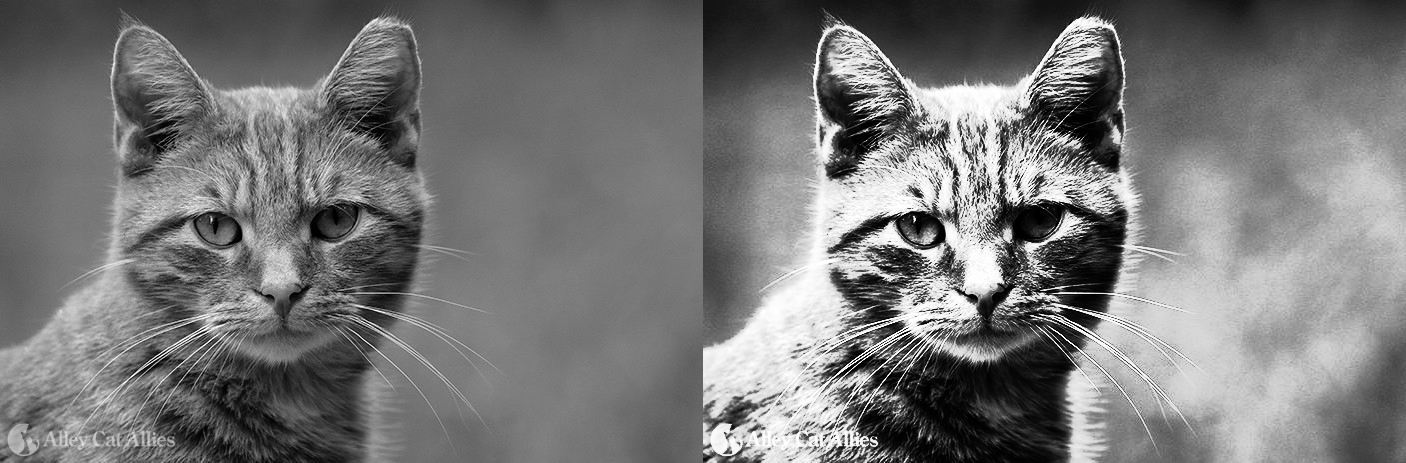

In [44]:
# Replace values in lst1 with corresponding values from the mapping dictionary
intensity_levels_new = [mapping[val] if val in mapping else val for val in intensity_levels]

# Reshape the intensity levels array to match the original image shape for equalized data
reconstructed_original_image  = np.array(intensity_levels_new).reshape(gray_image_manual1.shape)
# Reshape the intensity levels array to match the original image shape for original data
original_image  = np.array(intensity_levels).reshape(gray_image_manual1.shape)

# Convert the reconstructed image back to uint8 data type
reconstructed_original_image = np.uint8(reconstructed_original_image)
# Convert the original image back to uint8 data type
original_image = np.uint8(original_image)

# Display original image and equalized image
image_stack= np.hstack((original_image,reconstructed_original_image))
cv2_imshow(image_stack)

We notice above image increased in contrast but overall quality worsened after histogram equalization

The method is useful in images with backgrounds and foregrounds that are both bright or both dark. In particular, the method can lead to better views of bone structure in x-ray images, and to better detail in photographs that are either over or under-exposed.

Histogram equalization often produces unrealistic effects in photographs; however it is very useful for scientific images like thermal, satellite or x-ray images, often the same class of images to which one would apply false-color. Also histogram equalization can produce undesirable effects (like visible image gradient) when applied to images with low color depth.

{56: 0, 55: 1, 53: 1, 57: 2, 58: 2, 61: 3, 59: 3, 62: 4, 63: 4, 60: 5, 64: 5, 65: 6, 66: 6, 67: 7, 68: 7, 69: 8, 54: 8, 70: 9, 71: 9, 72: 10, 73: 10, 74: 11, 75: 11, 76: 12, 77: 13, 78: 13, 79: 14, 52: 14, 80: 15, 81: 16, 82: 16, 83: 17, 84: 18, 85: 18, 86: 19, 97: 20, 87: 20, 103: 21, 89: 22, 88: 22, 102: 23, 90: 24, 110: 25, 98: 26, 104: 26, 91: 27, 92: 28, 95: 29, 108: 29, 122: 30, 93: 31, 113: 32, 115: 33, 96: 34, 126: 35, 116: 36, 99: 36, 109: 37, 111: 38, 105: 39, 100: 40, 129: 41, 114: 42, 118: 42, 125: 43, 50: 44, 127: 45, 138: 46, 132: 47, 130: 48, 136: 49, 170: 50, 160: 52, 121: 53, 106: 53, 107: 54, 101: 55, 168: 56, 216: 58, 177: 59, 123: 60, 133: 61, 134: 62, 112: 63, 146: 64, 188: 66, 175: 67, 150: 68, 163: 70, 128: 71, 94: 71, 144: 73, 172: 74, 208: 76, 243: 77, 227: 79, 140: 80, 151: 81, 179: 83, 217: 85, 166: 86, 147: 87, 145: 88, 131: 89, 219: 91, 236: 93, 241: 95, 186: 96, 148: 97, 193: 99, 167: 100, 180: 101, 173: 103, 199: 104, 205: 106, 165: 107, 171: 109, 152: 11

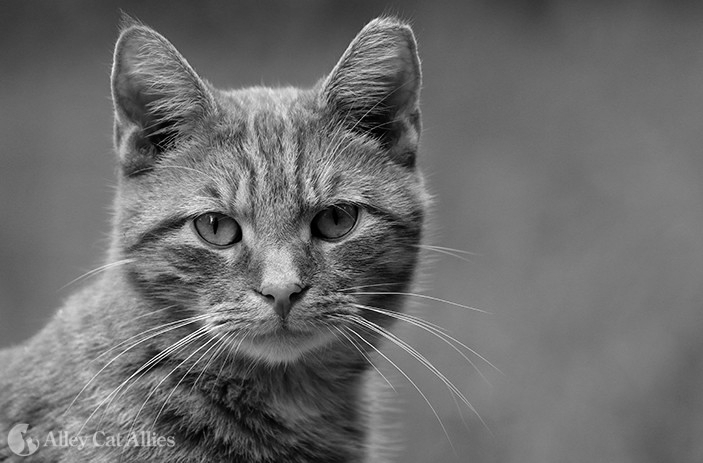

In [16]:
# Reshape the intensity levels array to match the original image shape
reconstructed_original_image  = np.array(intensity_levels).reshape(gray_image_manual1.shape)
#reconstructed_equalized_image = np.array(intensity_levels).reshape(gray_image_manual1.shape)

# Convert the reconstructed image back to uint8 data type
reconstructed_image = np.uint8(reconstructed_image)

# Display or save the reconstructed image
cv2_imshow(reconstructed_original_image)

# Slice an Image

In [ ]:
#Image width: 703
#Image height: 463
#Number of channels: 3

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Import necessary libraries
import cv2
from google.colab.patches import cv2_imshow

# Define row and column ranges
row_start, row_end = 301, 357
col_start, col_end = 204, 242

# Extract the specified region from the image
image_region = gray_image_manual[row_start:row_end, col_start:col_end]

# Get the actual row and column numbers for the DataFrame
row_indices = np.arange(row_start, row_end)
col_indices = np.arange(col_start, col_end)

# Create a DataFrame with the sliced image and apply color-coding
df = pd.DataFrame(image_region, index=row_indices, columns=col_indices)

# Invert the grayscale colormap
styled_df = df.style.set_properties(**{'font-size': '10pt'}).background_gradient(cmap='Greys_r')

# Display the styled DataFrame
styled_df

# Translate

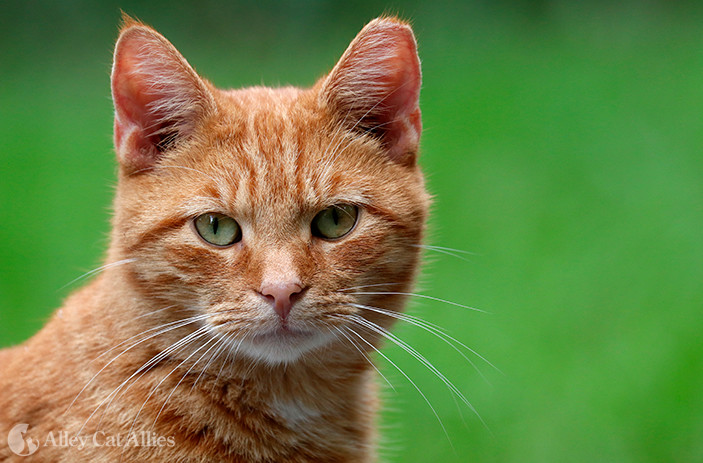

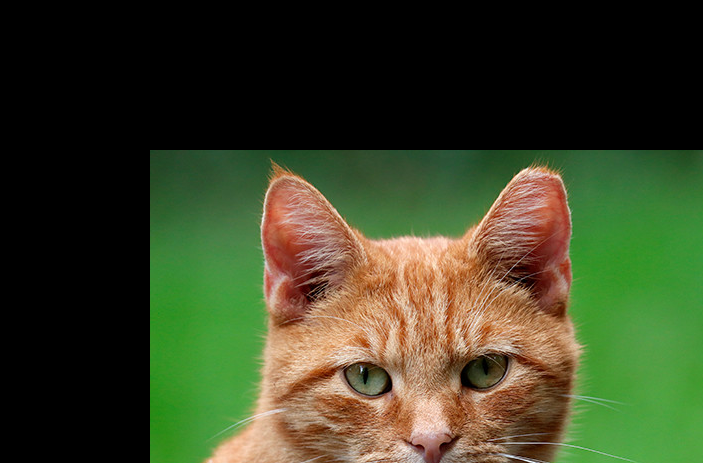

In [ ]:
# Define the translation parameters (dx and dy)
dx = 150
dy = 150

# Get the dimensions of the image
height, width, _ = image.shape

# Define the translated image
translated_image = np.zeros_like(image)

# Perform translation without using cv2.warpAffine
for y in range(height):
    for x in range(width):
        # Compute the translated coordinates
        x_translated = x + dx
        y_translated = y + dy

        # Check if the translated coordinates are within the image bounds
        if 0 <= x_translated < width and 0 <= y_translated < height:
            translated_image[y_translated, x_translated] = image[y, x]

# Display the original and translated images
cv2_imshow(image)
cv2_imshow(translated_image)

# Scale

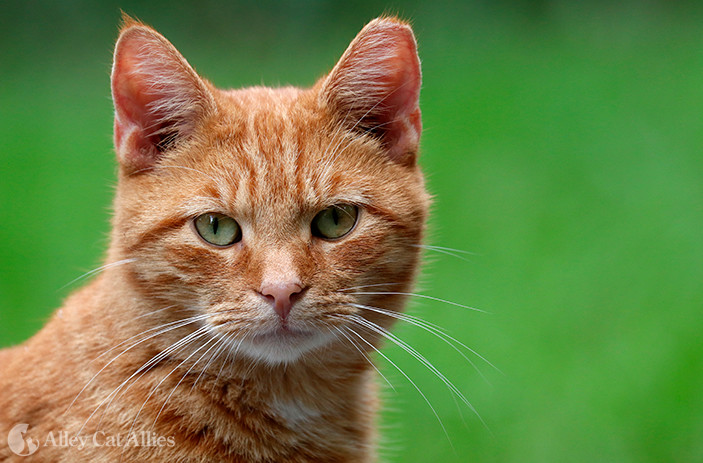

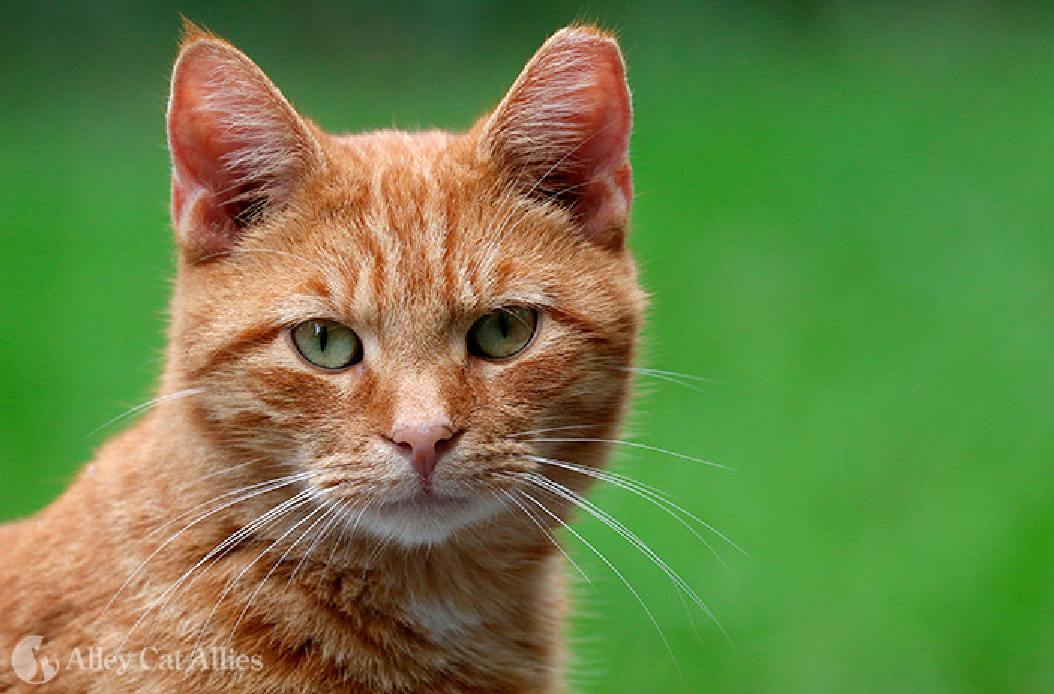

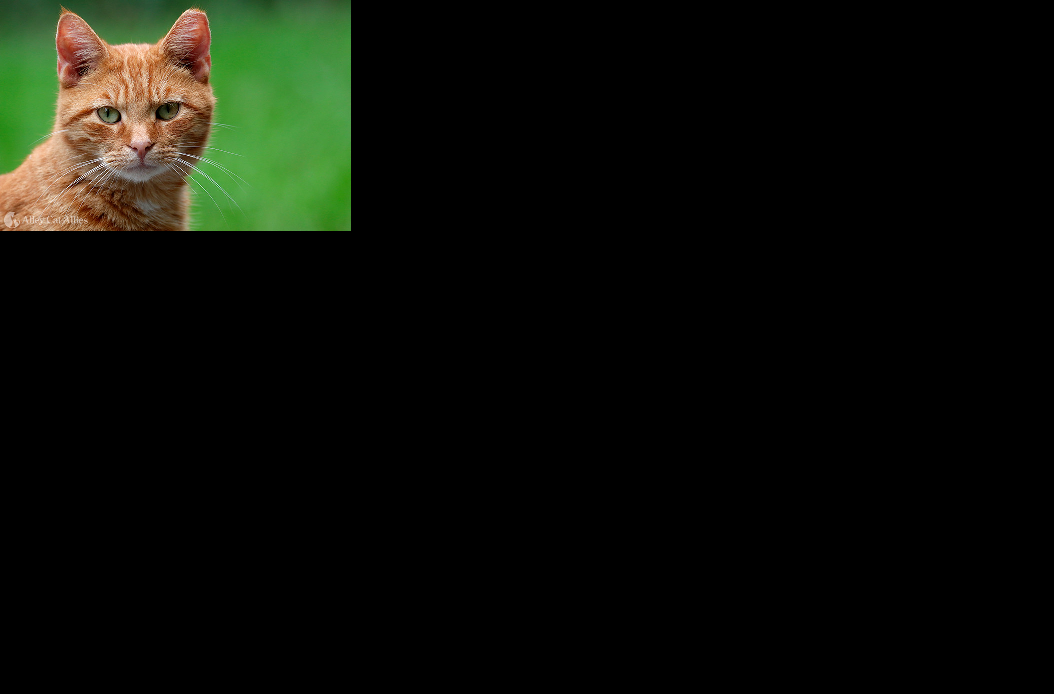

In [ ]:
# Define scaling factors (sx and sy)
sx = 1.5
sy = 1.5

sx1 = 0.5
sy1 = 0.5

# Get the dimensions of the image
height, width, _ = image.shape

# Define the scaled image dimensions
scaled_height = int(height * sy)
scaled_width = int(width * sx)

scaled_height_down = int(height * sy1)
scaled_width_down = int(width * sx1)

# Define the scaled image
scaled_image = np.zeros((scaled_height, scaled_width, 3), dtype=np.uint8)
scaled_image_down = np.zeros((scaled_height, scaled_width, 3), dtype=np.uint8)

# Perform scaling without using cv2.resize()
for y in range(scaled_height):
    for x in range(scaled_width):
        # Compute the corresponding coordinates in the original image
        orig_x = int(x / sx)
        orig_y = int(y / sy)

        # Check if the original coordinates are within the image bounds
        if 0 <= orig_x < width and 0 <= orig_y < height:
            scaled_image[y, x] = image[orig_y, orig_x]

# Perform scaling without using cv2.resize()
for y1 in range(scaled_height_down):
    for x1 in range(scaled_width_down):
        # Compute the corresponding coordinates in the original image
        orig_x = int(x1 / sx1)
        orig_y = int(y1 / sy1)

        # Check if the original coordinates are within the image bounds
        if 0 <= orig_x < width and 0 <= orig_y < height:
            scaled_image_down[y1, x1] = image[orig_y, orig_x]

# Display the original and scaled images
cv2_imshow(image)
cv2_imshow(scaled_image)
cv2_imshow(scaled_image_down)

# Rotate

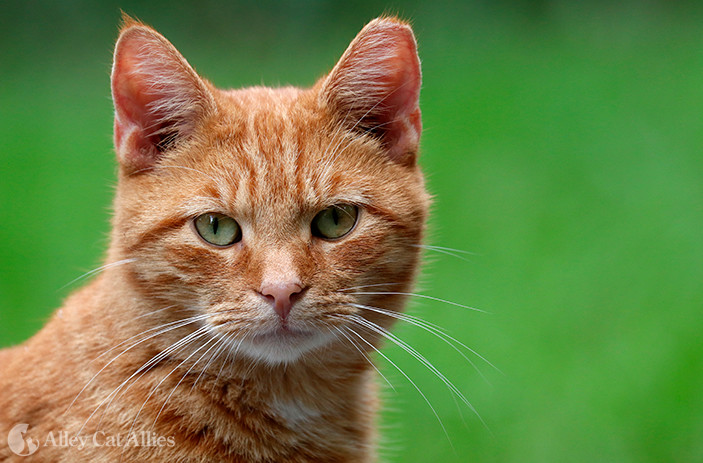

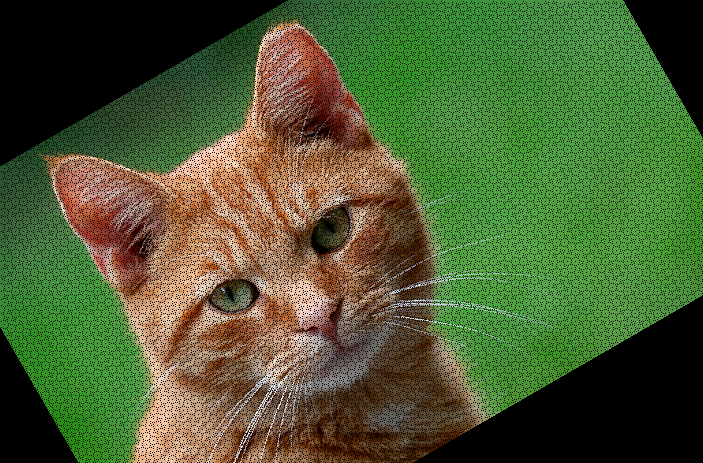

In [ ]:
# Define the rotation angle (in degrees)
angle = -30

# Get the dimensions of the image
height, width, _ = image.shape

# Define the rotation matrix
angle_radians = np.radians(angle)
cos_theta = np.cos(angle_radians)
sin_theta = np.sin(angle_radians)

# Define the center point for rotation
center_x = width / 2
center_y = height / 2

# Define the rotated image
rotated_image = np.zeros_like(image)

# Perform rotation without using cv2.warpAffine
for y in range(height):
    for x in range(width):
        # Translate coordinates to origin
        x_translated = x - center_x
        y_translated = y - center_y

        # Rotate coordinates
        x_rotated = int(x_translated * cos_theta - y_translated * sin_theta + center_x)
        y_rotated = int(x_translated * sin_theta + y_translated * cos_theta + center_y)

        # Check if the rotated coordinates are within the image bounds
        if 0 <= x_rotated < width and 0 <= y_rotated < height:
            rotated_image[y_rotated, x_rotated] = image[y, x]

# Display the original and rotated images
cv2_imshow(image)
cv2_imshow(rotated_image)

# Shear

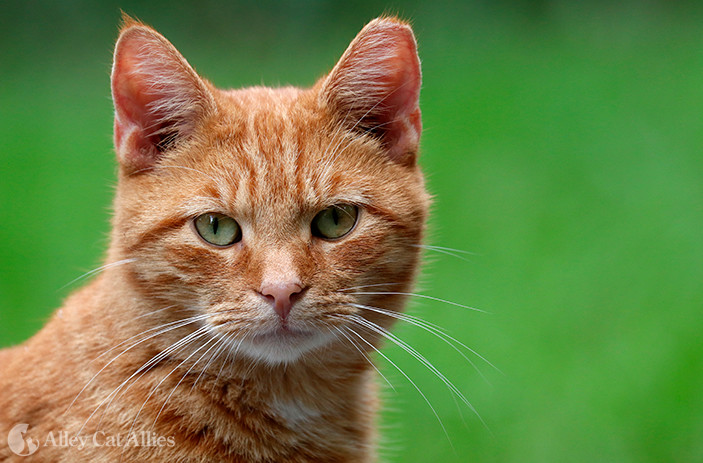

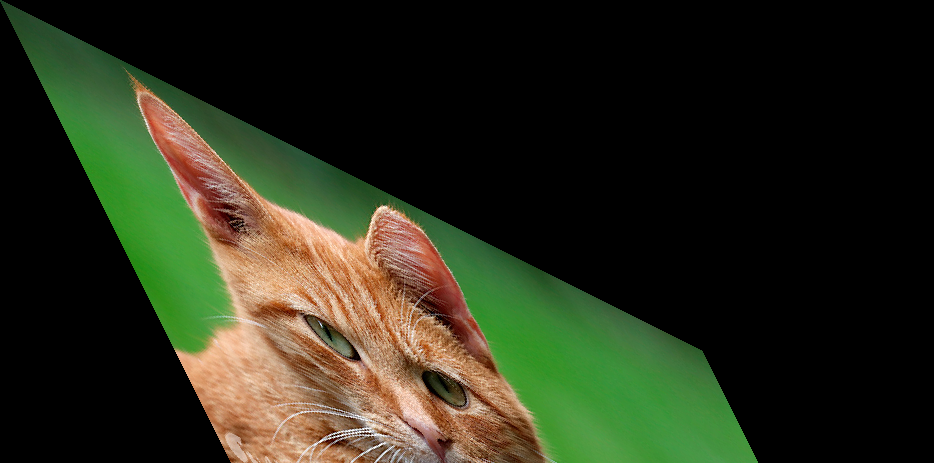

In [ ]:
# Define shear parameters (shx and shy)
shx = 0.5  # Shear factor for x direction
shy = 0.5  # Shear factor for y direction

# Get the dimensions of the image
height, width, _ = image.shape

# Define the sheared image dimensions
sheared_height = height
sheared_width = width + int(shx * height)  # Adjusted width to accommodate sheared pixels

# Define the sheared image
sheared_image = np.zeros((sheared_height, sheared_width, 3), dtype=np.uint8)

# Perform shear without using cv2.warpAffine()
for y in range(height):
    for x in range(width):
        # Compute the sheared coordinates
        sheared_x = x + int(shx * y)
        sheared_y = y + int(shy * x)

        # Check if the sheared coordinates are within the image bounds
        if 0 <= sheared_x < sheared_width and 0 <= sheared_y < sheared_height:
            sheared_image[sheared_y, sheared_x] = image[y, x]

# Display the original and sheared images
cv2_imshow(image)
cv2_imshow(sheared_image)

# Affine

In [ ]:
# Import necessary libraries
import numpy as np

# Define a single affine matrix for scale, rotation, shear, and translation
affine_matrix = np.array([[2, 0, 0],   # Scale by 2 along x-axis
                           [0, 0.5, 0], # Scale by 0.5 along y-axis
                           [1, 1, 1]])  # Shear and translation

# Define a point for demonstration
point = np.array([[1], [1], [1]])

# Apply affine transformations
scaled_point = np.dot(affine_matrix, point)
print("Scaled Point:", scaled_point)

# Define rotation angle (in radians)
theta = np.pi / 4  # 45 degrees

# Define rotation matrix
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],  # Rotation by 45 degrees
                             [np.sin(theta), np.cos(theta), 0],
                             [0, 0, 1]])

# Apply rotation
rotated_point = np.dot(rotation_matrix, point)
print("Rotated Point:", rotated_point)

# Define shear matrix
shear_matrix = np.array([[1, 1, 0],  # Shear by 1 along x-axis
                          [0, 1, 0],
                          [0, 0, 1]])

# Apply shear
sheared_point = np.dot(shear_matrix, point)
print("Sheared Point:", sheared_point)

# Define translation vector
translation_vector = np.array([[3], [4], [0]])  # Translate by (3, 4)

# Apply translation
translated_point = point + translation_vector
print("Translated Point:", translated_point)


Scaled Point: [[2. ]
 [0.5]
 [3. ]]
Rotated Point: [[1.11022302e-16]
 [1.41421356e+00]
 [1.00000000e+00]]
Sheared Point: [[2]
 [1]
 [1]]
Translated Point: [[4]
 [5]
 [1]]


In [ ]:
import plotly.graph_objs as go

# Get image dimensions
height, width = gray_image_manual.shape

# Create meshgrid for x and y coordinates
x, y = np.meshgrid(np.arange(width), np.arange(height))

# Flatten the image intensity values
intensity = gray_image_manual.flatten()

# Create 3D plot
fig = go.Figure(data=[go.Surface(z=intensity.reshape(height, width), colorscale='gray', showscale=False)])

# Set plot parameters
fig.update_layout(scene=dict(
                    xaxis=dict(title='X'),
                    yaxis=dict(title='Y'),
                    zaxis=dict(title='Intensity')
                    ))

# Show plot
fig.show()
